# importing

In [1]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
import torch
from torch import nn
import torchvision
from torchvision import transforms
from torchvision import models
torch.manual_seed(42)

# feature maps visualization 
- of given image

In [11]:
image_path = '/kaggle/input/architectural-heritage-elements-image64-dataset/train/bell_tower/0.jpg'
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
image = Image.open(image_path)

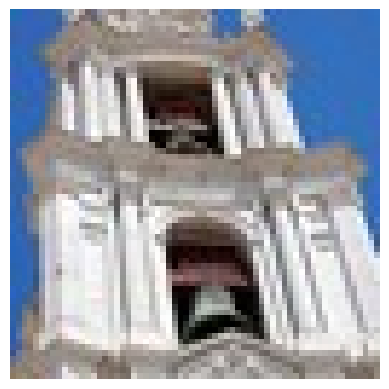

In [4]:
plt.imshow(image)
plt.axis('off');

In [6]:
model = models.densenet161(weights=models.densenet.DenseNet161_Weights.IMAGENET1K_V1)

Downloading: "https://download.pytorch.org/models/densenet161-8d451a50.pth" to /root/.cache/torch/hub/checkpoints/densenet161-8d451a50.pth
100%|██████████| 110M/110M [00:01<00:00, 95.1MB/s] 


In [9]:
conv_layers = []
for name, layer in model.named_modules():
    if isinstance(layer, nn.Conv2d):
        conv_layers.append((name, layer))

In [12]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5669, 0.5866, 0.6298], std=[0.2535, 0.2208, 0.2160]),
])
image_tensor = transform(image).unsqueeze(0).to(DEVICE)

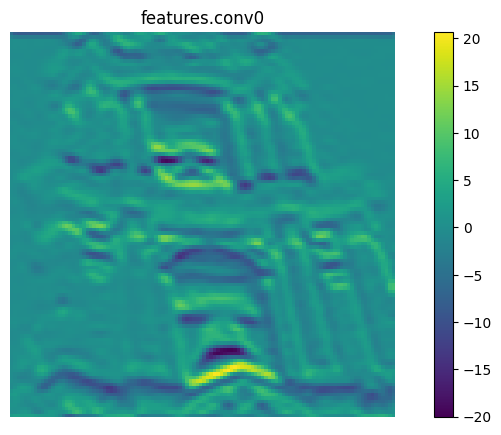

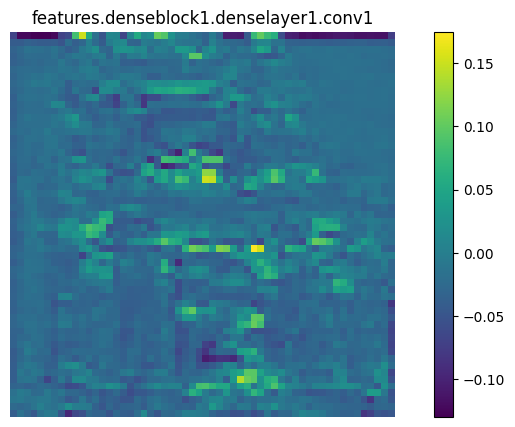

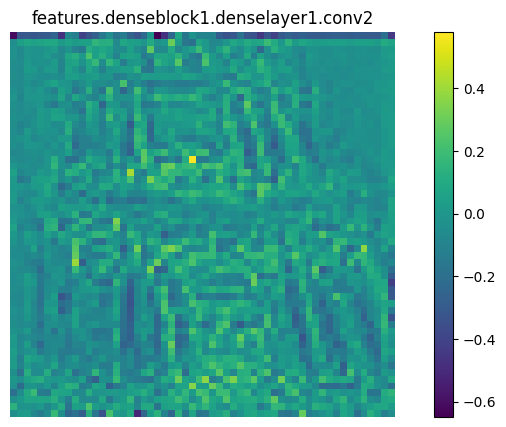

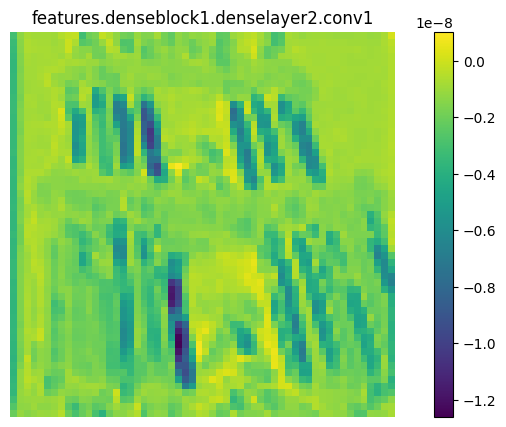

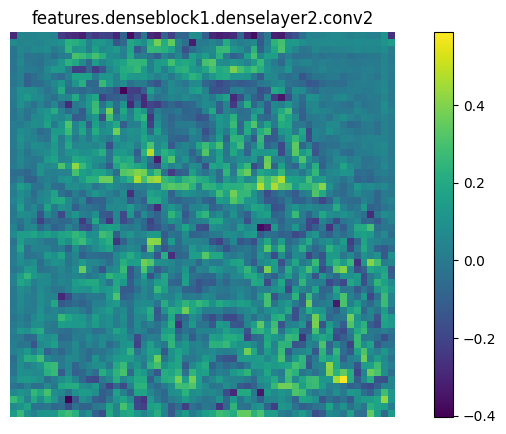

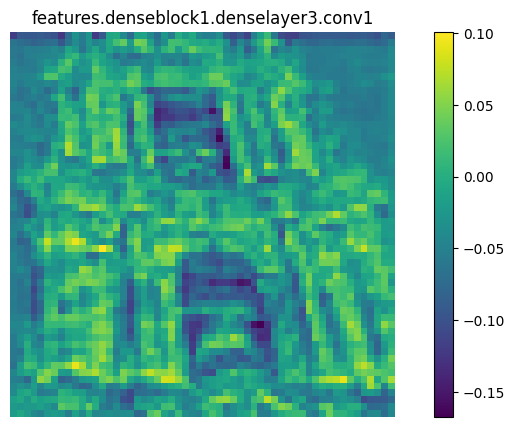

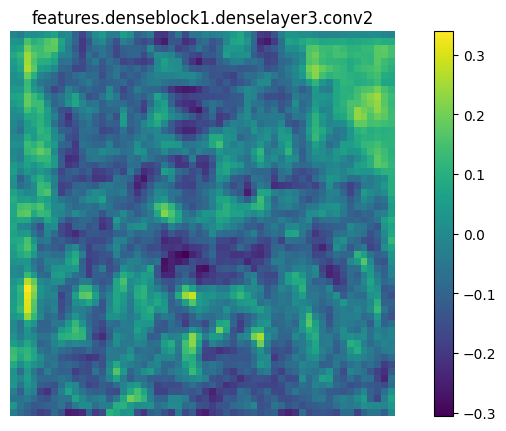

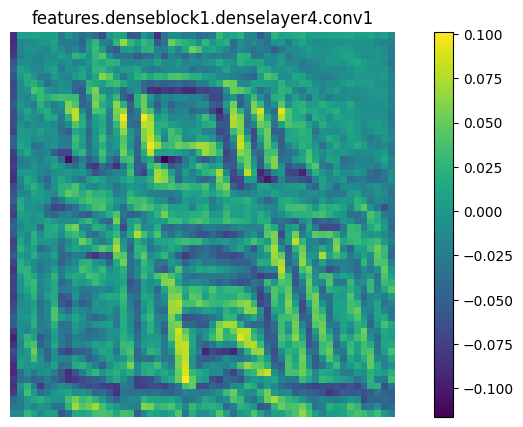

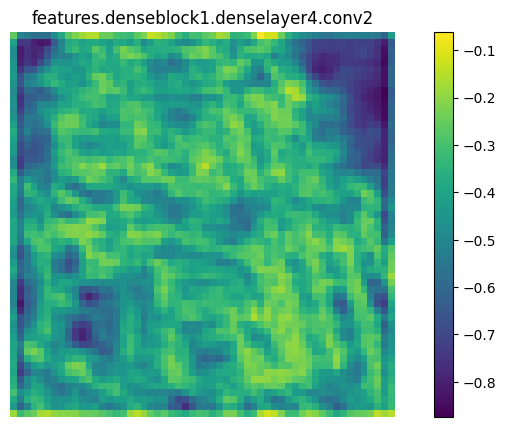

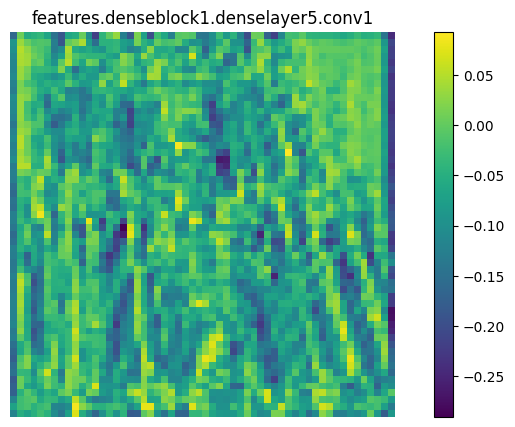

In [15]:
# Plot feature maps for convolutional layers
for name, layer in conv_layers[:10]:
    # Hook function to capture the layer output
    def hook_fn(module, input, output):
        global layer_output
        layer_output = output

    # Register the hook
    handle = layer.register_forward_hook(hook_fn)
    
    with torch.no_grad():
        model_output = model(image_tensor)
    
    handle.remove()
    
    # Get the output of the convolutional layer
    feature_map = layer_output.squeeze(0)
    
    # Plot the feature map
    plt.figure(figsize=(10, 5))
    plt.imshow(feature_map[0].cpu().detach().numpy(), cmap='viridis')
    plt.title(f'{name}')
    plt.colorbar()
    plt.axis('off')
    plt.show();